## Assignment 1 - Classification


## Learning Outcomes


* Data exploration and pre-processing

* Develop a pipeline to carry out classification

* Compare different metrics and classifiers

The objective is to predict whether or not a credit card client will default for their payment in the next month. We will be using the better of 2 classifiers namely, Random Forest and KNN Classifier, and determine the best of a given set of hyperparameters by using grid search.


In [30]:
## Use this for consistency in graphs through out the notebook
import numpy as np
import pandas as pd
import seaborn as sns

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


**Questions (12 marks total)**

Q1.  Explore the credit card data set provided. You can also access it from the this link 

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
(https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

The data is open for public use and no authorizations are required.

Make sure you perform your analyses and answer the questions in sections below:

1. Data exploration:  ( 3 marks) 

    - Explore the data ( for example look at the data, plot graphs ( histogram, pair plots)
  
**A1: The dataframe has a shape of (30000, 25) and consist of only int64 type values. This research employed a binary variable for the default payment(Yes = 1, No = 0) as the response variable. You will build a classification model for this default of credit card clients dataset.  The objective is to predict whether or not a credit card client will default for their payment in the next month, and there were 23 explanatory variables. For the class distribution, out of the 30000 entries, 6636 are defaults which accounts for 22.12% of the dataset.**
   
2. Data Preprocessing: (4 marks)

    - Make sure you build a full data pipeline ( ie., use the pipeline to apply transformers and estimators- https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html )
    - Do you require any data pre-processing? Are all the features useful? (Use only raw features from this dataset, in other words, no need to create feature crosses or new features)
    - Set the random seed to 123 (For splitting or any other random algorithm)
    - Split data into training (80%) and testing (20%)
    - Use Cross-validation with 5-folds
    - For other parameters, use default
    
**A2: Yes, there are categorical features that require One-Hot Encoder transformation, and numerical data, that needs scaling. There are no missing values, and no imputers were needed.**

**Some features are not very useful and can be omitted, here is the final set of features applied:**
- dep_var = ["default"]
- categorical_features = ['SEX', 'EDUCATION']
- numerical_features = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',  'PAY_AMT6']
- discrete_features = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']


3. Classification: (5 marks)

    - Study the ROC Curve, decide threshold
    - Use 2 classifiers.
    
         a. Random Forest
            - tune only: n_estimators: {4, 5, 10, 20, 50}.  We will be running random forest model using GridSearchCV, determine the best hyperparameter for the given list of n_estimators {4, 5, 10, 20, 50}. n_estimators refers to the number of trees in the forest. We will use CV = 5 and the scoring to be the roc_auc (area under the curve)
            
         b. KNN Classfier 
            - tune only: n_neighbors: {3, 5, 10, 20}. You may perform similar GridSearchCV as in the previous exercise with a given list of n_neightbors. 
        
    - Which one performs better in the cross validation? Note down your observations and give comments.            
            
**A3: In the cross validation, Random Forest performs slightly better than KNN.**

**Random Forest has minimal RMSE = 0.4292 for n_estimators = 50
KNN Classifier has minimal RMSE = 0.4325 for n_neighbours = 20.**

**The grid search confirms the best performance of the above mentioned models. 
When applied on the test data, Random Forest's final model shows better accuracy than KNN Classifier model:
Random Forest:
RMSE: 0.5829427263653113
Predicted 1-5: [0 0 1 1 0]
Actual 1-5: [0 0 1 1 0]
Model Accuracy: 0.9993333333333333**

**KNN:
RMSE: 0.531008265263148
Predicted 1-5: [0 0 1 0 0]
Actual 1-5: [0 0 1 1 0]
Model Accuracy: 0.8245666666666667**

**Upon studying the ROC curve and the threshold, 
Random Forest: ROC AUC=0.760
KNN: ROC AUC=0.749**

**Threshold:
Random Forest: (0.3797,0.8445)
KNN: (0.3623,0.8365)**

**Conclusions:**
**The performance of both models is quite similar, but I would select Random Forest Classifier because of its better accuracy.**
      
    
You may refer to the documentation for RandomForests and KNN Classifiers, for the different parameters and options available in the scikit-learn library.
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html



**1. Data Exploration**

Total number of clients: 30000
Defaults: 6636 (22.12%)


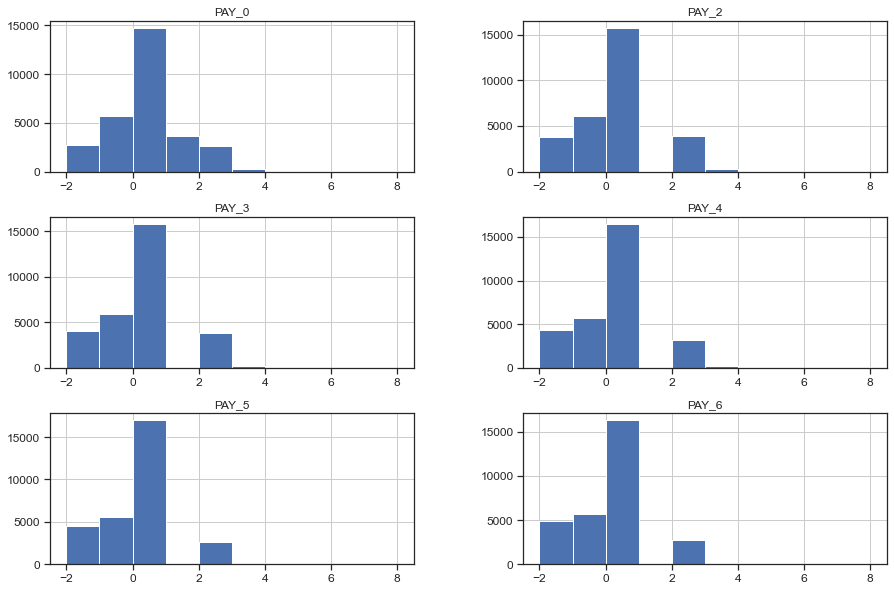

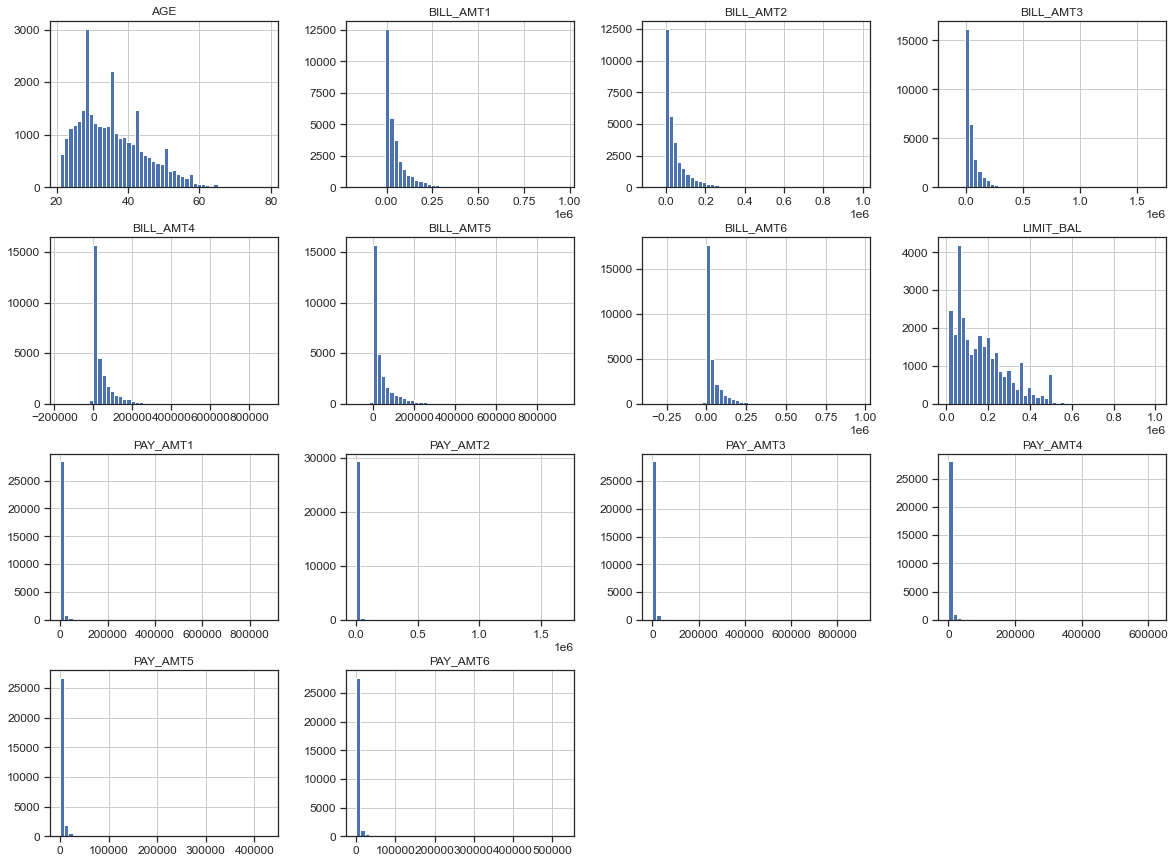

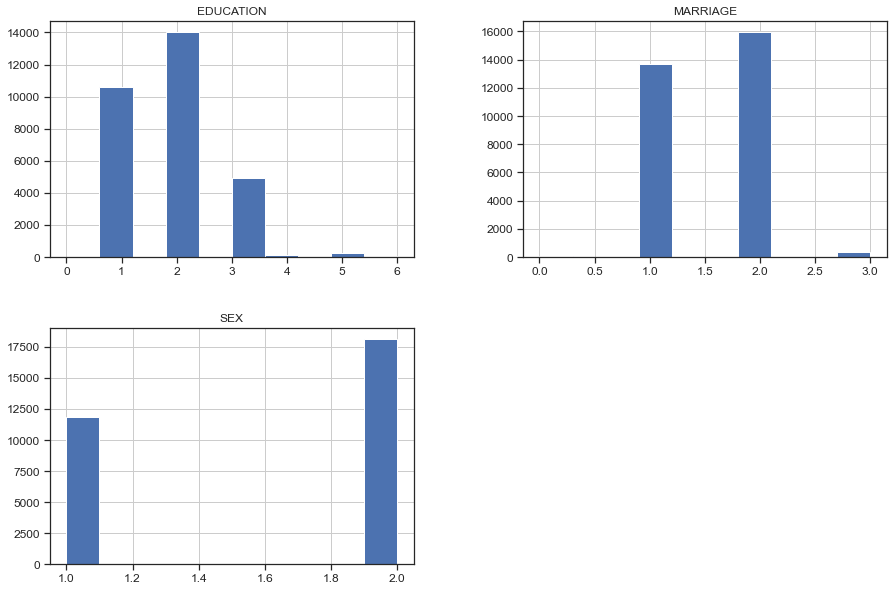

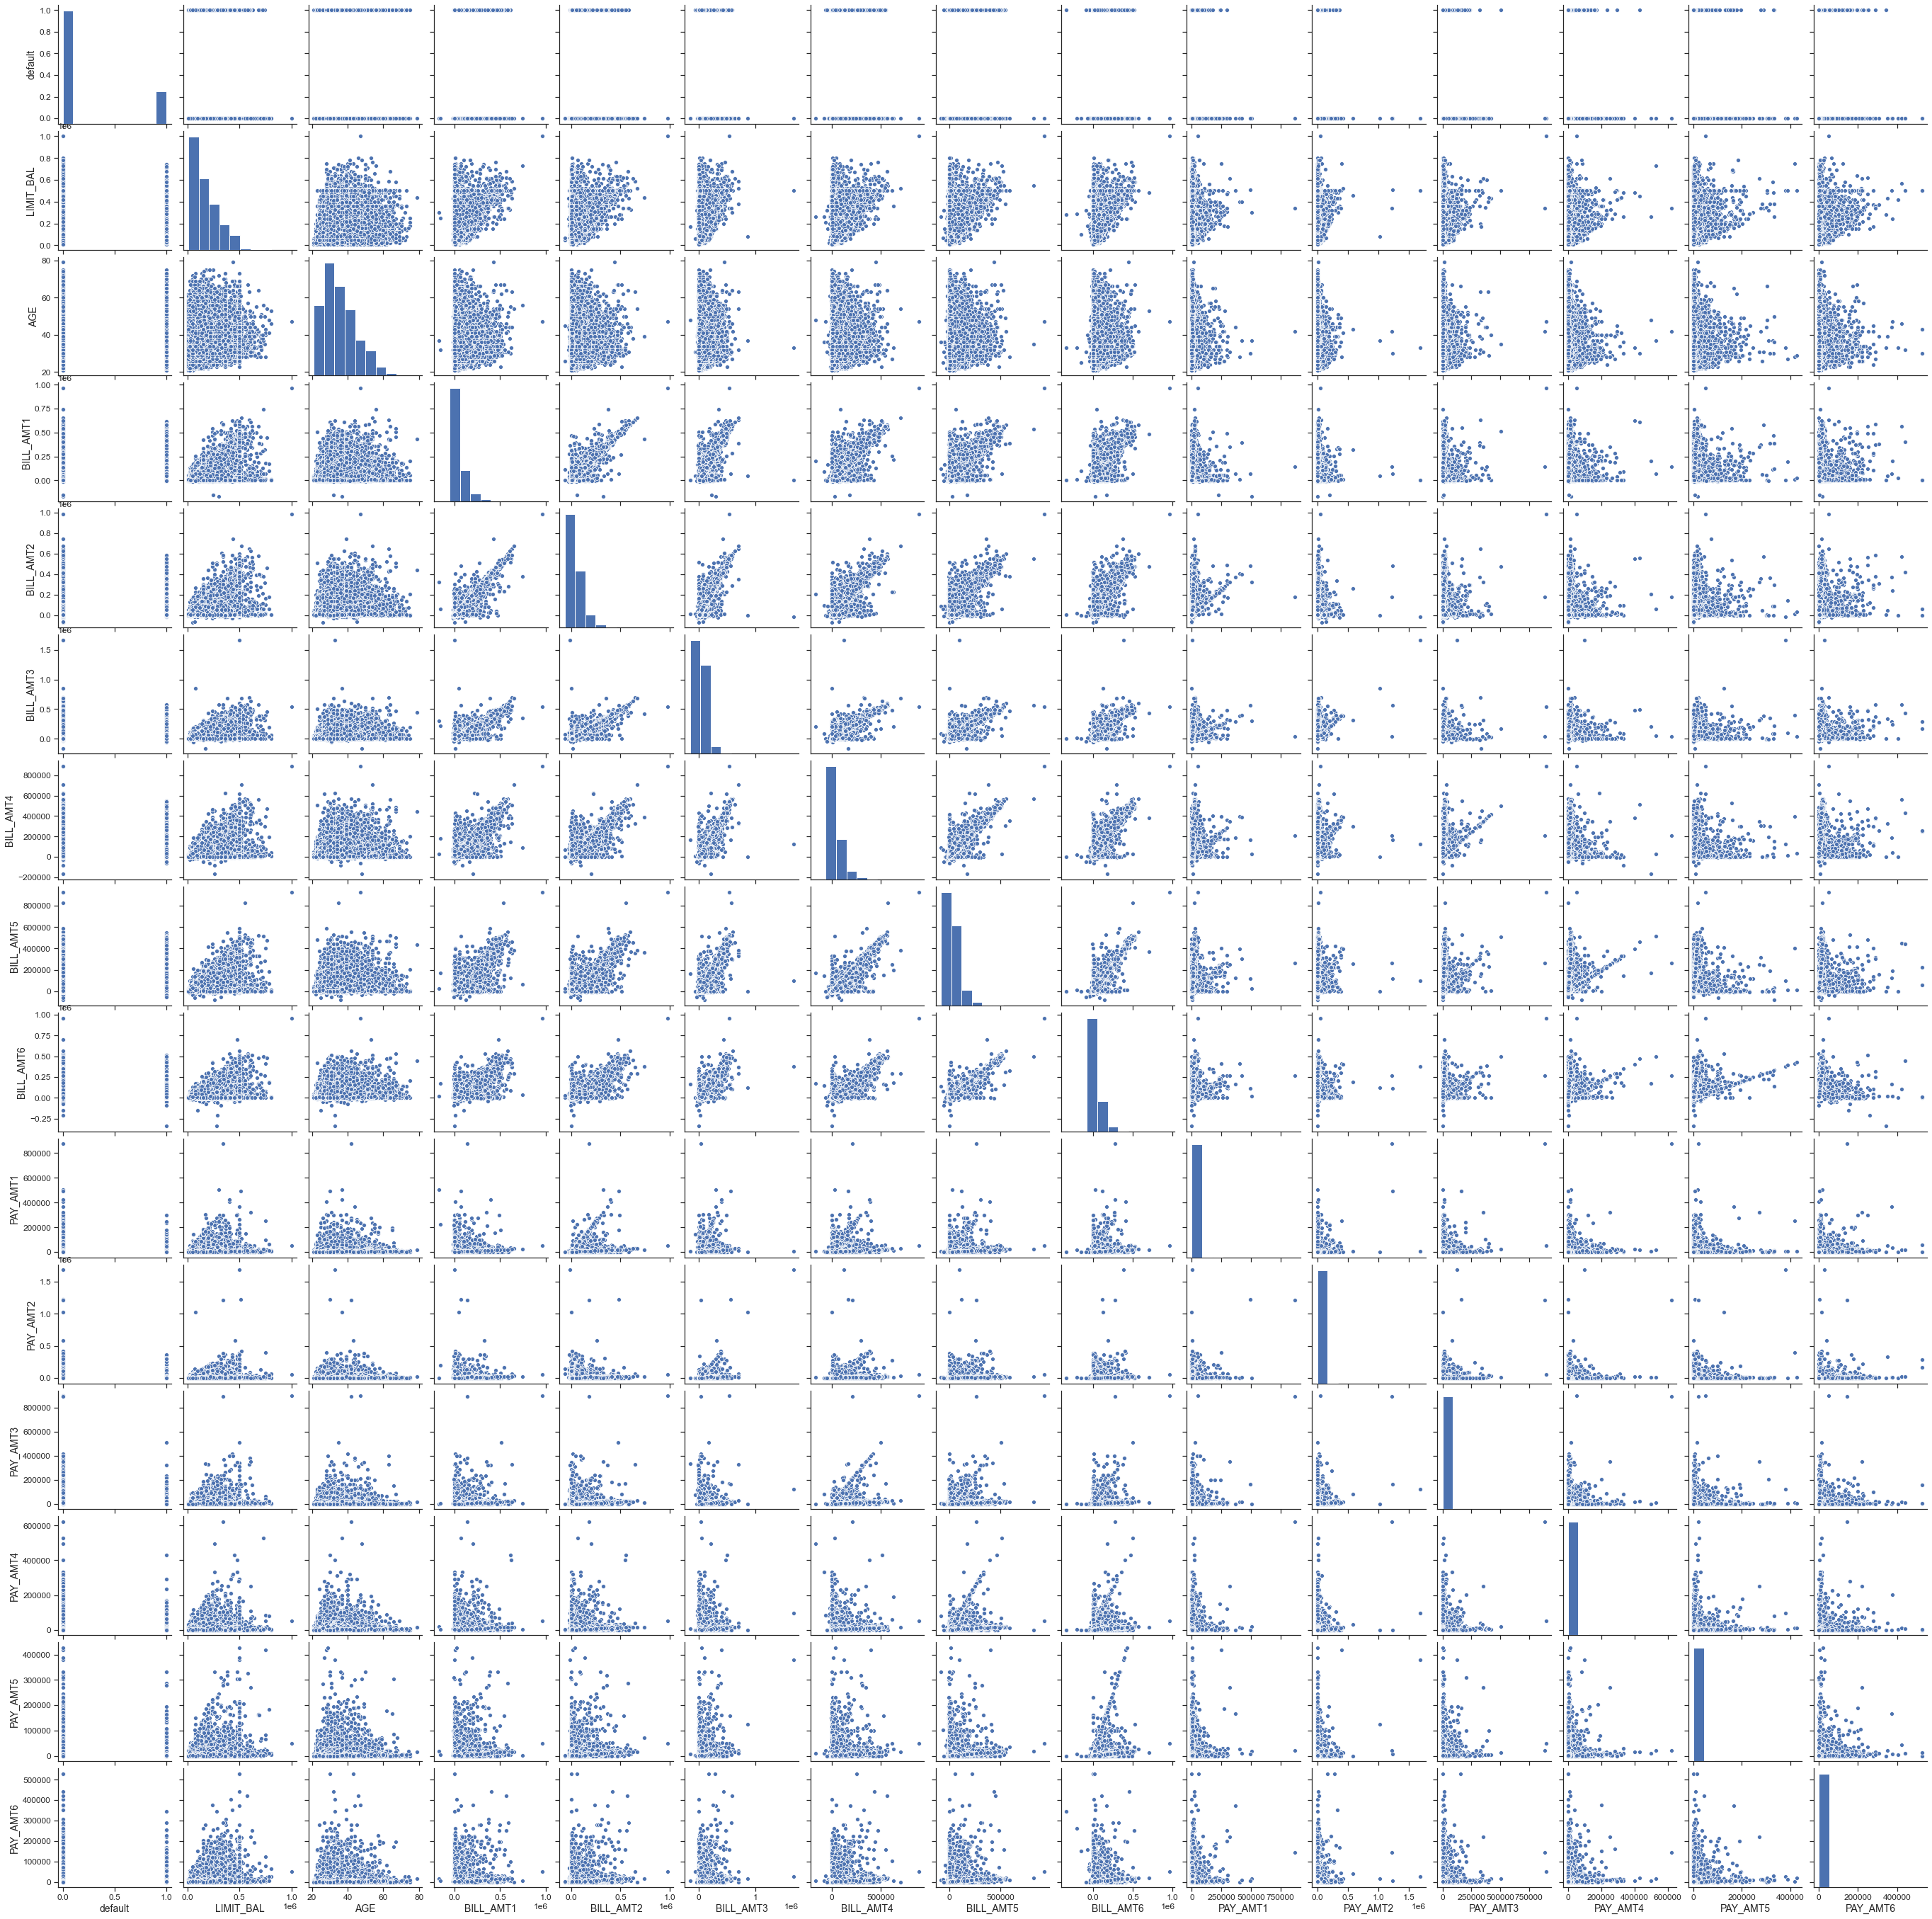

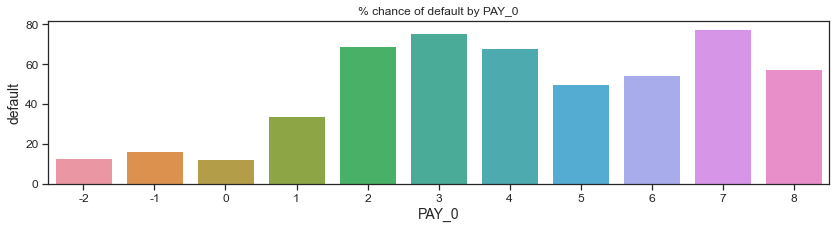

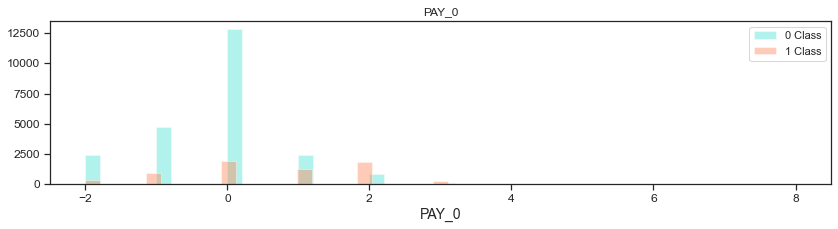

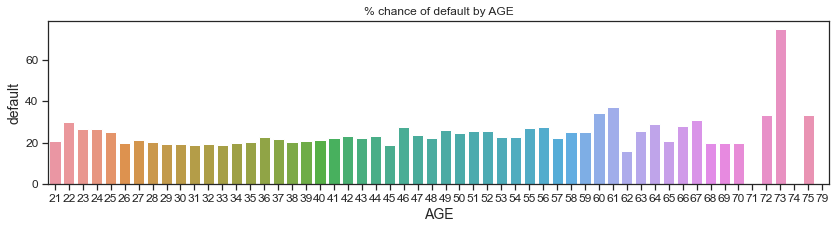

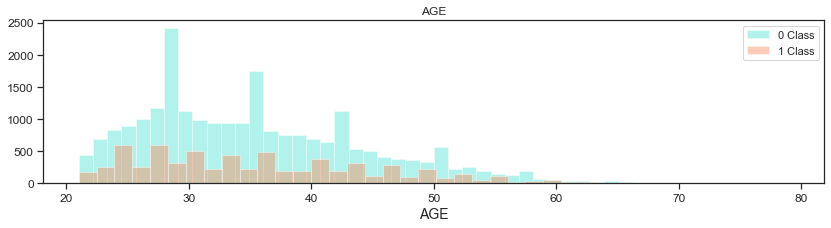

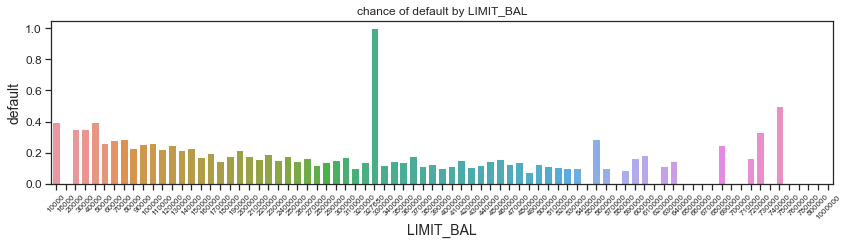

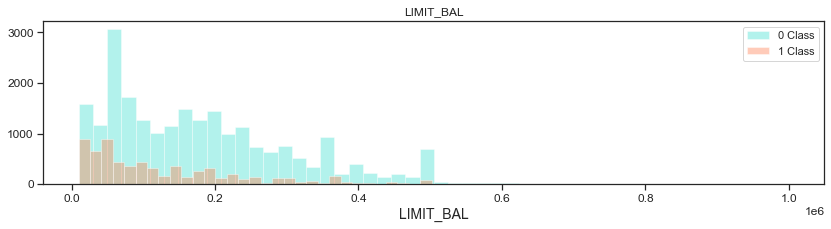

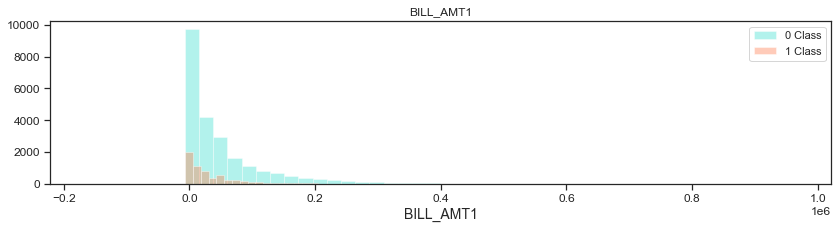

,default,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,SEX,EDUCATION,MARRIAGE
default,1.000000,-0.153520,0.013890,-0.019644,-0.014193,-0.014076,-0.010156,-0.006760,-0.005372,-0.072929,-0.058579,-0.056250,-0.056827,-0.055124,-0.053183,0.324794,0.263551,0.235253,0.216614,0.204149,0.186866,-0.039961,0.028006,-0.024339
PAY_0,0.324794,-0.271214,-0.039447,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,-0.057643,0.105364,0.019917
PAY_2,0.263551,-0.296382,-0.050148,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,-0.070771,0.121566,0.024199
PAY_3,0.235253,-0.286123,-0.053048,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,-0.066096,0.114025,0.032688
PAY_4,0.216614,-0.267460,-0.049722,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,-0.060173,0.108793,0.033122
PAY_5,0.204149,-0.249411,-0.053826,0.206684,0.226913,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,-0.055064,0.097520,0.035629
PAY_6,0.186866,-0.235195,-0.048773,0.207373,0.226924,0.241181,0.266356,0.290894,0.285091,-0.001496,-0.005223,0.005834,0.019018,-0.046434,-0.025299,0.474553,0.575501,0.632684,0.716449,0.816900,1.000000,-0.044008,0.082316,0.034345
LIMIT_BAL,-0.153520,1.000000,0.144713,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.024755,-0.219161,-0.108139
PAY_AMT1,-0.072929,0.195236,0.026147,0.140277,0.280365,0.244335,0.233012,0.217031,0.199965,1.000000,0.285576,0.252191,0.199558,0.148459,0.185735,-0.079269,-0.080701,0.001295,-0.009362,-0.006089,-0.001496,-0.000242,-0.037456,-0.005979
PAY_AMT2,-0.058579,0.178408,0.021785,0.099355,0.100851,0.316936,0.207564,0.181246,0.172663,0.285576,1.000000,0.244770,0.180107,0.180908,0.157634,-0.070101,-0.058990,-0.066793,-0.001944,-0.003191,-0.005223,-0.001391,-0.030038,-0.008093


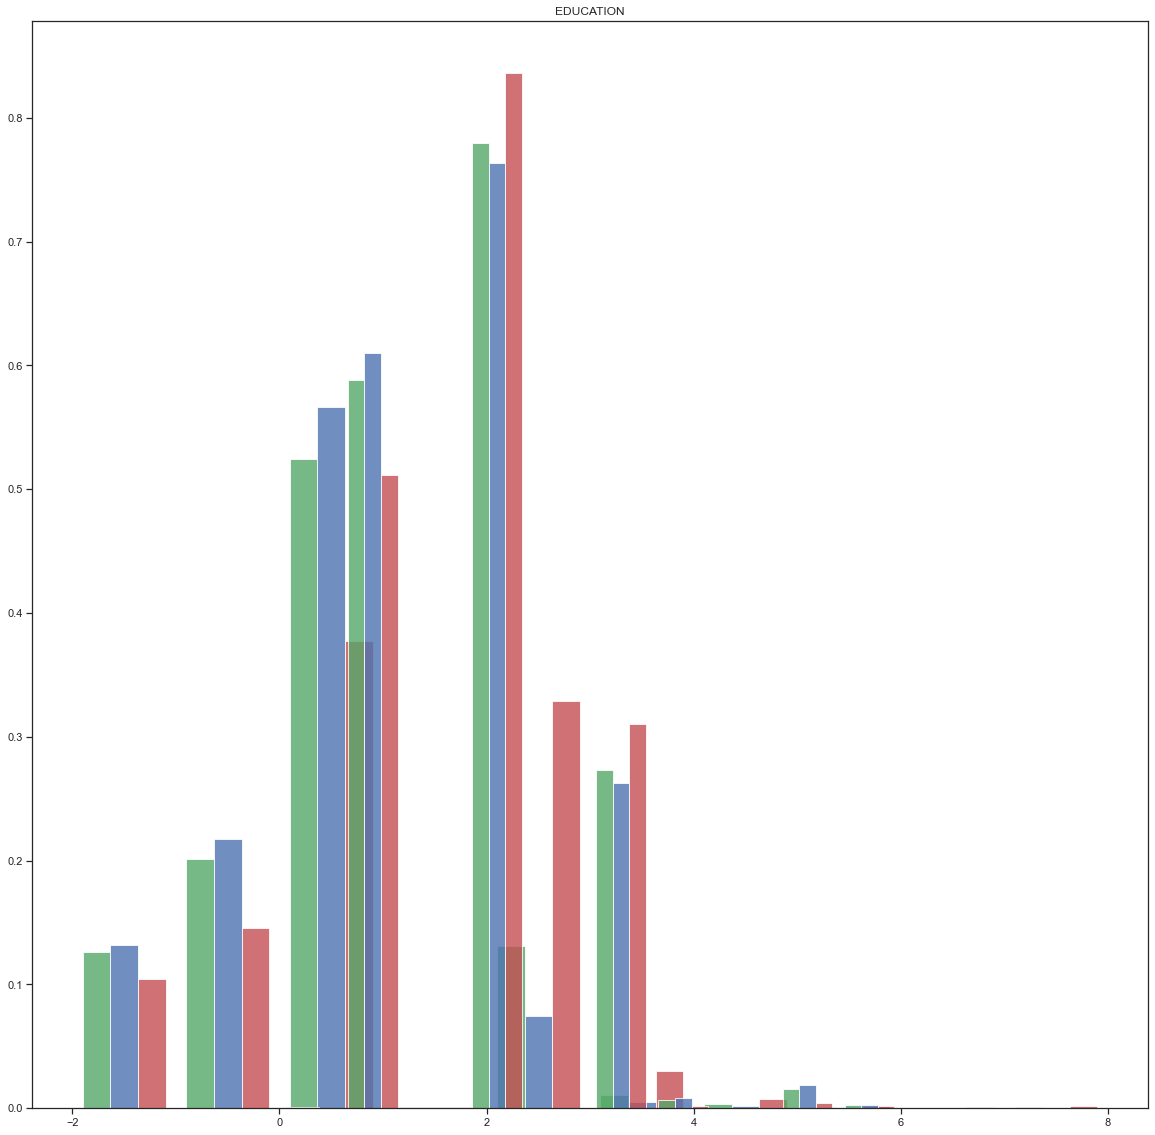

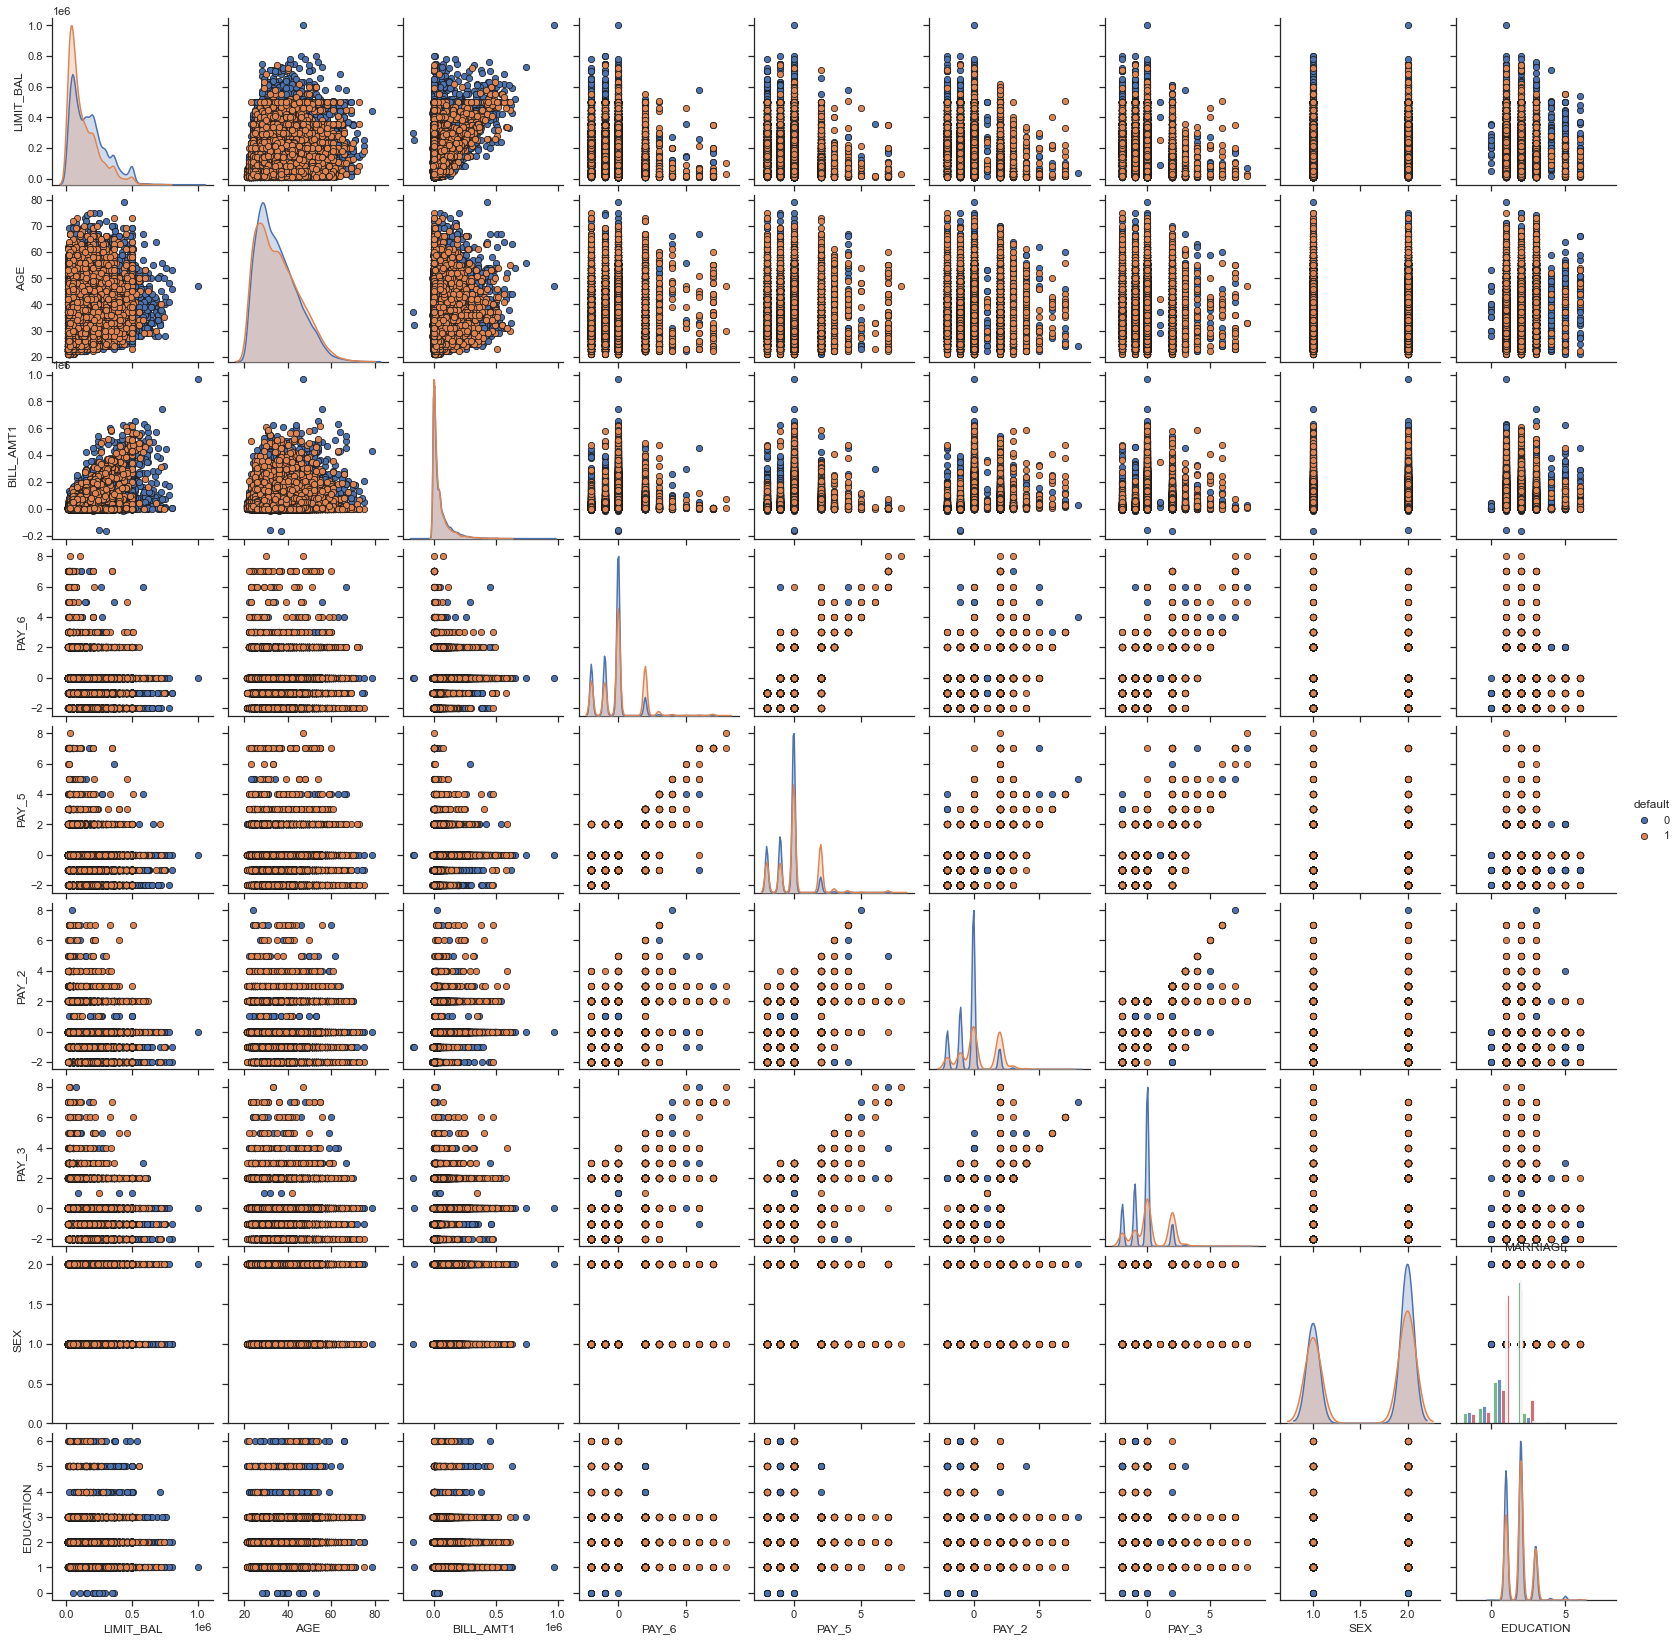

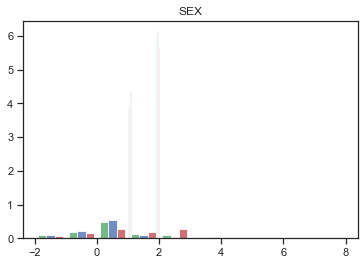

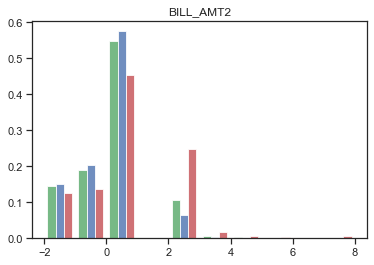

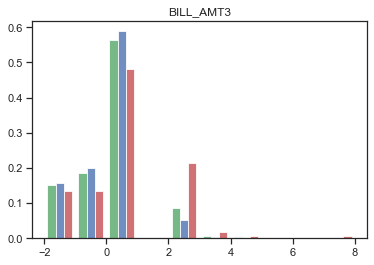

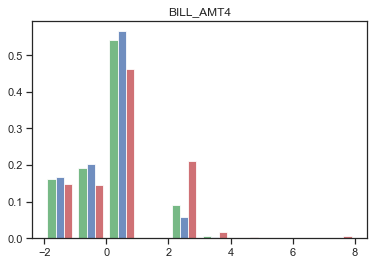

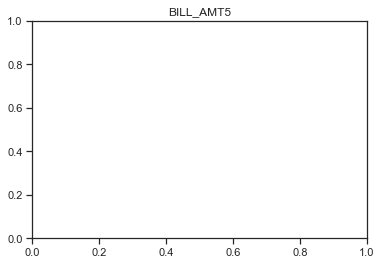

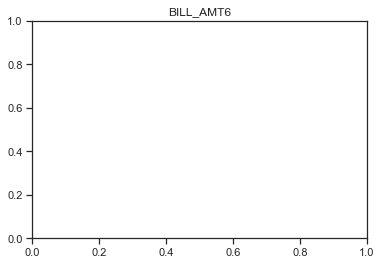

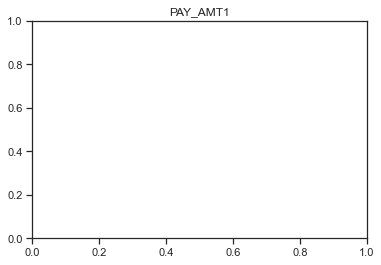

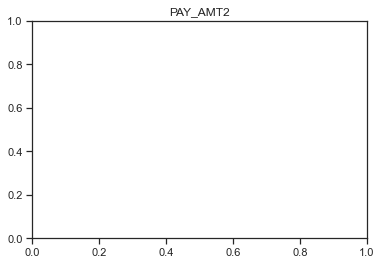

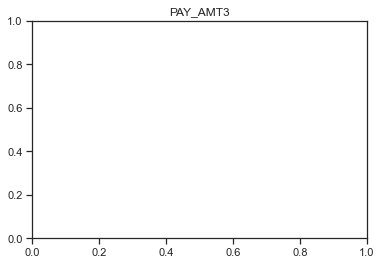

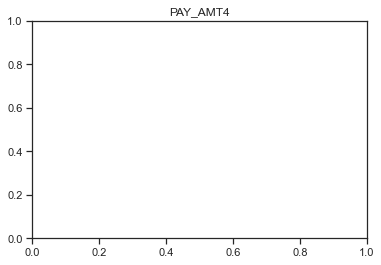

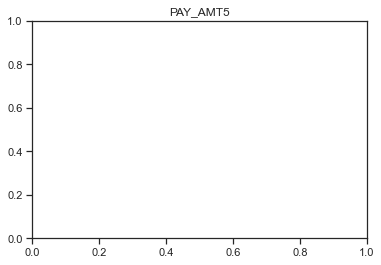

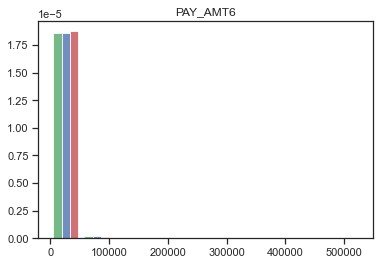

In [31]:
df = pd.read_excel("./default of credit card clients.xls",  skiprows = 1, header = 0)
df_explore = df.copy()

df = df.rename(columns={"default payment next month": "default"})  #renaming column to default
df_explore = df_explore.rename(columns={"default payment next month": "default"}) 

df.shape
df_explore.dtypes

pd.options.display.max_columns = None
df_explore.sample(15, random_state=123)
## Feel free to use multiple cells  and continue from here:

#df = pd.read_excel("/path/to/file/default of credit card clients.xls", sheet = 0, skiprows= 1, header = 0)

# Counting Null Values
count_nulls = [ (x, df_explore[x].isnull().sum()) for x in df_explore.columns]
count_nulls

# Class Distribution
defaults_distr = pd.DataFrame(df_explore['default'].value_counts().astype(int))
defaults_distr

print('Total number of clients: ' + str(int(defaults_distr['default'][0]+defaults_distr['default'][1]))) 
print('Defaults: ' + str(int(defaults_distr['default'][1])) + ' (' +
      str((100.0*defaults_distr['default'][1])/(defaults_distr['default'][0]+defaults_distr['default'][1])) + '%)')

dependant_var = ["default"]

categorical_vars = ['SEX', 'EDUCATION', 'MARRIAGE']

continuous_vars = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                   'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
discrete_vars = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

pd.options.display.max_columns = None
df_explore.loc[:, dependant_var + discrete_vars + continuous_vars].describe()

df_explore.loc[:, discrete_vars].hist(bins=10, figsize=(15,10))
plt.show();

df_explore.loc[:, continuous_vars].hist(bins=50, figsize=(20,15))
plt.show();

df_explore.loc[:, categorical_vars].hist(bins=10, figsize=(15,10))
plt.show();

sns.pairplot(data=df_explore.loc[:, dependant_var + continuous_vars]);

plt.figure(figsize=(14,3))
pay0_pivot = df_explore.groupby('PAY_0').default.mean().reset_index()
sns.barplot(pay0_pivot.PAY_0, pay0_pivot.default*100.0)
plt.title('% chance of default by PAY_0')
plt.show()

plt.figure(figsize=(14,3))
bp_pivot = df_explore.groupby('PAY_0').default.count().reset_index()
sns.distplot(df_explore[df_explore.default == 0]['PAY_0'], color='turquoise', kde=False, label='0 Class')
sns.distplot(df_explore[df_explore.default == 1]['PAY_0'], color='coral', kde=False, label='1 Class')
plt.legend()
plt.title('PAY_0')
plt.show()

plt.figure(figsize=(14,3))
age_pivot = df_explore.groupby('AGE').default.mean().reset_index()
sns.barplot(age_pivot.AGE, age_pivot.default*100.0)
plt.title('% chance of default by AGE')
plt.show()

plt.figure(figsize=(14,3))
bp_pivot = df_explore.groupby('AGE').default.count().reset_index()
sns.distplot(df_explore[df_explore.default == 0]['AGE'], color='turquoise', kde=False, label='0 Class')
sns.distplot(df_explore[df_explore.default == 1]['AGE'], color='coral', kde=False, label='1 Class')
plt.legend()
plt.title('AGE')
plt.show()

plt.figure(figsize=(14,3))
lb_pivot = df_explore.groupby('LIMIT_BAL').default.mean().reset_index()
sns.barplot(lb_pivot.LIMIT_BAL, lb_pivot.default)
plt.title('chance of default by LIMIT_BAL')
plt.xticks(rotation=45, size=8)
plt.show()

plt.figure(figsize=(14,3))
bp_pivot = df_explore.groupby('LIMIT_BAL').default.count().reset_index()
sns.distplot(df_explore[df_explore.default == 0]['LIMIT_BAL'], color='turquoise', kde=False, label='0 Class')
sns.distplot(df_explore[df_explore.default == 1]['LIMIT_BAL'], color='coral', kde=False, label='1 Class')
plt.legend()
plt.title('LIMIT_BAL')
plt.show()

plt.figure(figsize=(14,3))
bp_pivot = df_explore.groupby('BILL_AMT1').default.count().reset_index()
sns.distplot(df_explore[df_explore.default == 0]['BILL_AMT1'], color='turquoise', kde=False, label='0 Class')
sns.distplot(df_explore[df_explore.default == 1]['BILL_AMT1'], color='coral', kde=False, label='1 Class')
plt.legend()
plt.title('BILL_AMT1')
plt.show()

sns.set(style='ticks')
plt.figure(figsize=(20,20))
sns.pairplot(df_explore.loc[:, dependant_var + ['LIMIT_BAL', 'AGE', 'BILL_AMT1','PAY_6', 'PAY_5', 'PAY_2', 'PAY_3', 'SEX', 'EDUCATION']], hue='default', plot_kws=
    {
    "s":40,
    "alpha":1.0,
    'lw':0.5,
    'edgecolor':'k'
    });

# Df to draw charts for clients that default
df_default = df_explore.where(df_explore['default']==1)

# Df to draw charts for clients that default
df_ok = df_explore.where(df_explore['default']==0)

#Discrete Variables
for i, var in enumerate(discrete_vars):
    plt.figure(i)
    plt.title(var)

    plt.hist([df_explore.loc[:, var], df_ok.loc[:, var], df_default.loc[:, var]], density=True, color=['g','b','r'], alpha=0.8);

#Continuous Variables
for i, var in enumerate(continuous_vars):
    plt.figure(i)
    plt.title(var)

plt.hist([df_explore.loc[:, var], df_ok.loc[:, var], df_default.loc[:, var]], density=True, color=['g','b','r'], alpha=0.8);

#Categorical Variables
for i, var in enumerate(categorical_vars):
    plt.figure(i)
    plt.title(var)

    plt.hist([df_explore.loc[:, var], df_ok.loc[:, var], df_default.loc[:, var]], density=True, color=['g','b','r'], alpha=0.8);

#Correlation Analysis
corr_matrix = df_explore.loc[:, ['default'] + continuous_vars + discrete_vars + categorical_vars].corr(method='pearson')
#corr_matrix.sort_values(by=['default'], ascending=False)
corr_matrix.reindex(corr_matrix.default.abs().sort_values(ascending=False).index)


**2. Data Preparation and Preprocessing**



In [32]:
dep_var = ["default"]
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']
numerical_features = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                   'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
discrete_features = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

import scipy
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

def rmse(a, b):
    return np.sqrt(np.mean((a-b)**2))
pd.options.display.max_columns = None

# to make this notebook's output identical at every run
np.random.seed(123)

# Categorical - one hot encode
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
cat_steps = [cat_ohe_step]
cat_pipe = Pipeline(cat_steps)
cat_transformers = [('cat', cat_pipe, categorical_features)]

# Numerical - scale
num_scl_step = ('scl', MinMaxScaler())
num_steps = [num_scl_step]
num_pipe = Pipeline(num_steps)
num_transformers = [('num', num_pipe, numerical_features + discrete_features)]

%%time
ct = ColumnTransformer(transformers=cat_transformers + num_transformers)
ct.fit(df[categorical_features + numerical_features  + discrete_features])
X = ct.transform(df[categorical_features + numerical_features + discrete_features])
y = df[['default']].values

X.shape

df_describe = pd.DataFrame(X)
df_describe.describe()

%%time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

UsageError: Line magic function `%%time` not found.


**3. Classification** 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

def display_results(model, X, y):
    print("RMSE:", rmse(model.predict(X), y))
    print("Predicted 1-5:", model.predict(X_test[0:5]))
    print("Actual 1-5:", y_test[0:5, 0])
    
### Random Forest Classifier
%%time
for n_est in [4, 5, 10, 20, 50]:
    rf = RandomForestClassifier(n_estimators=n_est, random_state=123)
    rf.fit(X_train, np.ravel(y_train))
    print('----- Number of estimators:' + str(n_est) + '-------------')
    display_results(rf, X, y)
    
### KNeighbors Classifier
%%time
for n_nei in [3, 5, 10, 20]:
    knn = KNeighborsClassifier(n_neighbors=n_nei)
    knn.fit(X_train, np.ravel(y_train))
    print('----- Number of neighbors:' + str(n_nei) + '-------------')
    display_results(knn, X, y)
    
# Best RMSE: a) Random Forest: n_estimators=4; b) KNeighbors: n_neighbours=10
rf_best = RandomForestClassifier(n_estimators=4, random_state=123)
rf_best.fit(X_train, np.ravel(y_train))

knn_best = KNeighborsClassifier(n_neighbors=5)
knn_best.fit(X_train, np.ravel(y_train))# Use the forest's predict method on the test data

predictions = rf_best.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error
print('Mean Absolute Error:', round(np.mean(errors), 4))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 4), '%.')

feature_list = categorical_features + numerical_features + discrete_features

# Get numerical feature importances
importances = list(rf_best.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances starting from most important
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


In [ ]:
# Use KNN predict method on the test data

predictions = knn_best.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 4))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 4), '%.')

feature_list = categorical_features + numerical_features + discrete_features

# Get numerical feature importances
importances = list(rf_best.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances starting from most important
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

**Examining important parameters only, Importance >= 0.005**

In [ ]:
dep_var = ["default"]
categorical_features = ['SEX', 'EDUCATION']
numerical_features = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
discrete_features = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Categorical - One Hot Encoding
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
cat_steps = [cat_ohe_step]
cat_pipe = Pipeline(cat_steps)
cat_transformers = [('cat', cat_pipe, categorical_features)]

# Numerical - Scale
num_scl_step = ('scl', MinMaxScaler(feature_range = (-2, 10)))
num_steps = [num_scl_step]
num_pipe = Pipeline(num_steps)
num_transformers = [('num', num_pipe, numerical_features + discrete_features)]

ct = ColumnTransformer(transformers=cat_transformers + num_transformers)
ct.fit(df[categorical_features + numerical_features  + discrete_features])
X = ct.transform(df[categorical_features + numerical_features + discrete_features])
y = df[['default']].values

%%time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

%%time
### Random Forest
for n_est in [4, 5, 10, 20, 50]:
    rf = RandomForestClassifier(n_estimators=n_est, random_state=123)
    rf.fit(X_train, np.ravel(y_train))
    print('----- Number of estimators:' + str(n_est) + '-------------')
    display_results(rf, X, y)
    
%%time
### K Neighbours
for n_nei in [3, 5, 10, 20]:
    knn = KNeighborsClassifier(n_neighbors=n_nei)
    knn.fit(X_train, np.ravel(y_train))
    print('----- Number of neighbors:' + str(n_nei) + '-------------')
    display_results(knn, X, y)
    
#Removing unimportant parametrs slightly improved Random Forest results. For KNeighbours, the results are slightly worse.
#Only the important parameters will be considered in the following calculations.

**Cross validation**

In [ ]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", np.sqrt(-scores))
    print("Mean:", np.sqrt(-scores).mean())
    print("Standard deviation:", np.sqrt(-scores).std())
    
%%time

for n_est in [4, 5, 10, 20, 50]:
    print('------------ Random Forest. n_estimators = ', str(n_est), ' ------------')
    rf = RandomForestClassifier(n_estimators=n_est, random_state=123)
    scores = cross_val_score(rf, X, np.ravel(y), cv=5, scoring='neg_mean_squared_error')
    np.sqrt(-scores)
    display_scores(scores)
    
%%time
for n_nei in [3, 5, 10, 20]:
    print('---------- KNN. n_neighbours = ', str(n_nei) , '----------')
    knn = KNeighborsClassifier(n_neighbors=n_nei)
    scores = cross_val_score(knn, X, np.ravel(y), cv=5, scoring='neg_mean_squared_error')
    np.sqrt(-scores)
    display_scores(scores)

**Hyperparameter Search**

In [ ]:
from sklearn.model_selection import GridSearchCV

**1. Random Forest**

In [ ]:
%%time

# we create a dictionary of lists, each key is a parameter name
# and the list is the possible values it can take

param_grid = {
    'n_estimators':[4, 5, 10, 20, 50]
}

clf = RandomForestClassifier(n_estimators =  50, random_state = 123)
# we pass the model, our parameter grid, and cross-validation parameters to the class
grid_search = GridSearchCV(estimator=clf, 
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5)
# last, we fit our data. This will take a while...
grid_search.fit(X=X, y=np.ravel(y))

print(grid_search.best_params_)
print("\n", grid_search.best_estimator_)

cv_scores= grid_search.cv_results_
cv_scores = grid_search.cv_results_
for mean_score, params in zip(cv_scores['mean_test_score'], cv_scores['params']):
    if np.sqrt(-mean_score) < 0.43027 :
        print(np.sqrt(-mean_score), params)

final_model_rf = grid_search.best_estimator_
display_results(final_model_rf, X_test, y_test)
print(f'Model Accuracy: {final_model_rf.score(X_test, y_test)}')

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import accuracy_score, confusion_matrix

# ROC curve and AUC

# Fitting a model
model = final_model_rf
model.fit(X_train, np.ravel(y_train))

# Predicting probabilities
rf_probs = model.predict_proba(X_test)

# Keeping probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# calculate scores

rf_auc = roc_auc_score(y_test, rf_probs)
# Summarizing scores
print(' Random forest: ROC AUC=%.3f' % (rf_auc))

# Calculating ROC Curve
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, rf_probs)
#print('Thresholds', thresholds)

# Plotting the ROC Curve for the model
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest: ROC Curve')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# Show the Legend
pyplot.legend(loc=4)
# Show the Plot
pyplot.show()

# Estimate the threshold for Random Forest

print('Accuracy score:', accuracy_score(y_test, rf_probs.round()))

sns.heatmap(confusion_matrix(y_test, rf_probs.round()), annot=True, cmap='YlGn')

print('TPR=',str(4400/(4400+810)))
print('FPR=',str(300/(300+490)) )
# On the ROC space, the x-axis is FPR, and the y-axis is TPR. So point (0.3797,0.8445) is obtained. 

%%time

# we create a dictionary of lists, each key is a parameter name
# and the list is the possible values it can take

param_grid = {
    'n_neighbors':[3, 5, 10, 20]
}

clf = KNeighborsClassifier()
# we pass the model, our parameter grid, and cross-validation parameters to the class
grid_search = GridSearchCV(estimator=clf, 
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5)
# last, we fit our data. This will take a while...
grid_search.fit(X=X, y=np.ravel(y))

print(grid_search.best_params_)
print("\n", grid_search.best_estimator_)

cv_scores= grid_search.cv_results_
cv_scores = grid_search.cv_results_
for mean_score, params in zip(cv_scores['mean_test_score'], cv_scores['params']):
    if np.sqrt(-mean_score) < 0.45 :
        print(np.sqrt(-mean_score), params)
        
final_model_knn = grid_search.best_estimator_
display_results(final_model_knn, X_test, y_test)
print(f'Model Accuracy: {final_model_knn.score(X, y)}')

scores = cross_val_score(final_model_knn, X, np.ravel(y), cv=5, scoring='neg_mean_squared_error')
display_scores(scores)

# Actual class predictions
knn_predictions = final_model_knn.predict(X_test)
# Probabilities for each class
knn_probs = final_model_knn.predict_proba(X_test)[:, 1]



In [ ]:
# ROC Curve and AUC

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# Fit a model
model = final_model_knn
model.fit(X_train, np.ravel(y_train))

# Predict probabilities
knn_probs = model.predict_proba(X_test)

# Keep probabilities for the positive outcome only
knn_probs = knn_probs[:, 1]

# Calculate scores
knn_auc = roc_auc_score(y_test, knn_probs)

# Summarize scores
print( 'ROC AUC=%.3f' % (knn_auc))

# Calculate roc curves
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, knn_probs)

# Plot the roc curve for the model
pyplot.plot(knn_fpr, knn_tpr, marker='.', label='KNN')

# Axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# Show the legend
pyplot.legend()
# Show the plot
pyplot.show()

# Estimating the threshold for Random Forest

print('Accuracy score:', accuracy_score(y_test, knn_probs.round()))

sns.heatmap(confusion_matrix(y_test, knn_probs.round()), annot=True, cmap='YlGn')

print('TPR=',str(4400/(4400+860)))
print('FPR=',str(250/(250+440)) )
# On the ROC space, the x-axis is FPR, and the y-axis is TPR. So point (0.3623,0.8365) is obtained. 

# Compare the ROC curves
pyplot.figure(figsize=(15,15)) 
pyplot.plot(rf_fpr, rf_tpr, marker='*', label='Random Forest', color='r')
pyplot.plot(knn_fpr, knn_tpr, marker='.', label='KNN', color='b')
pyplot.legend();